In [57]:
import matplotlib.pyplot as plt
import utils

# Load raw data

raw_data = utils.load_data("/home/tototmek/Studia/Magisterka/code/bee_counter_firmware/data/experiments/2025-07-20/2025-07-20_12-04-33.csv")
channels = ['delta0', 'delta1', 'delta2', 'delta3', 'delta4', 'delta5', 'delta6', 'delta7']

print(raw_data.head())

      time  delta0  delta1  delta2  delta3  delta4  delta5  delta6  delta7
0  2764383      27     -36      42     -43      67     -36      50     -28
1  2764393      27     -35      42     -42      60     -35      50     -27
2  2764403      28     -35      41     -43      69     -35      50     -27
3  2764413      27     -35      41     -43      66     -35      52     -28
4  2764423      27     -35      41     -44      71     -35      51     -27


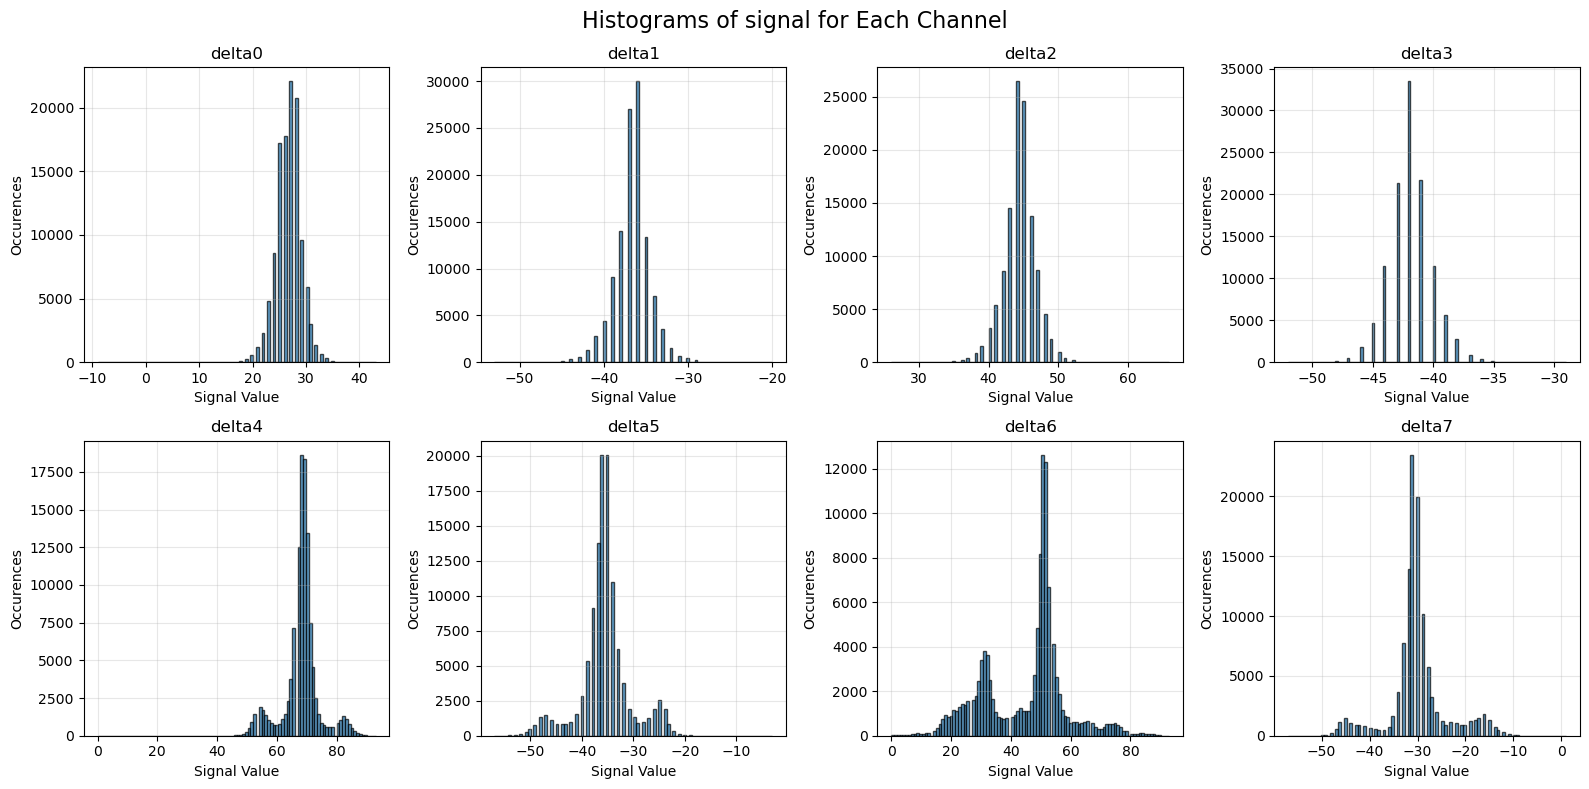

In [58]:
# Create a figure with subplots for all channels
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Histograms of signal for Each Channel', fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

for i, channel in enumerate(channels):
    axes[i].hist(raw_data[channel], bins=100, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{channel}')
    axes[i].set_xlabel('Signal Value')
    axes[i].set_ylabel('Occurences')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


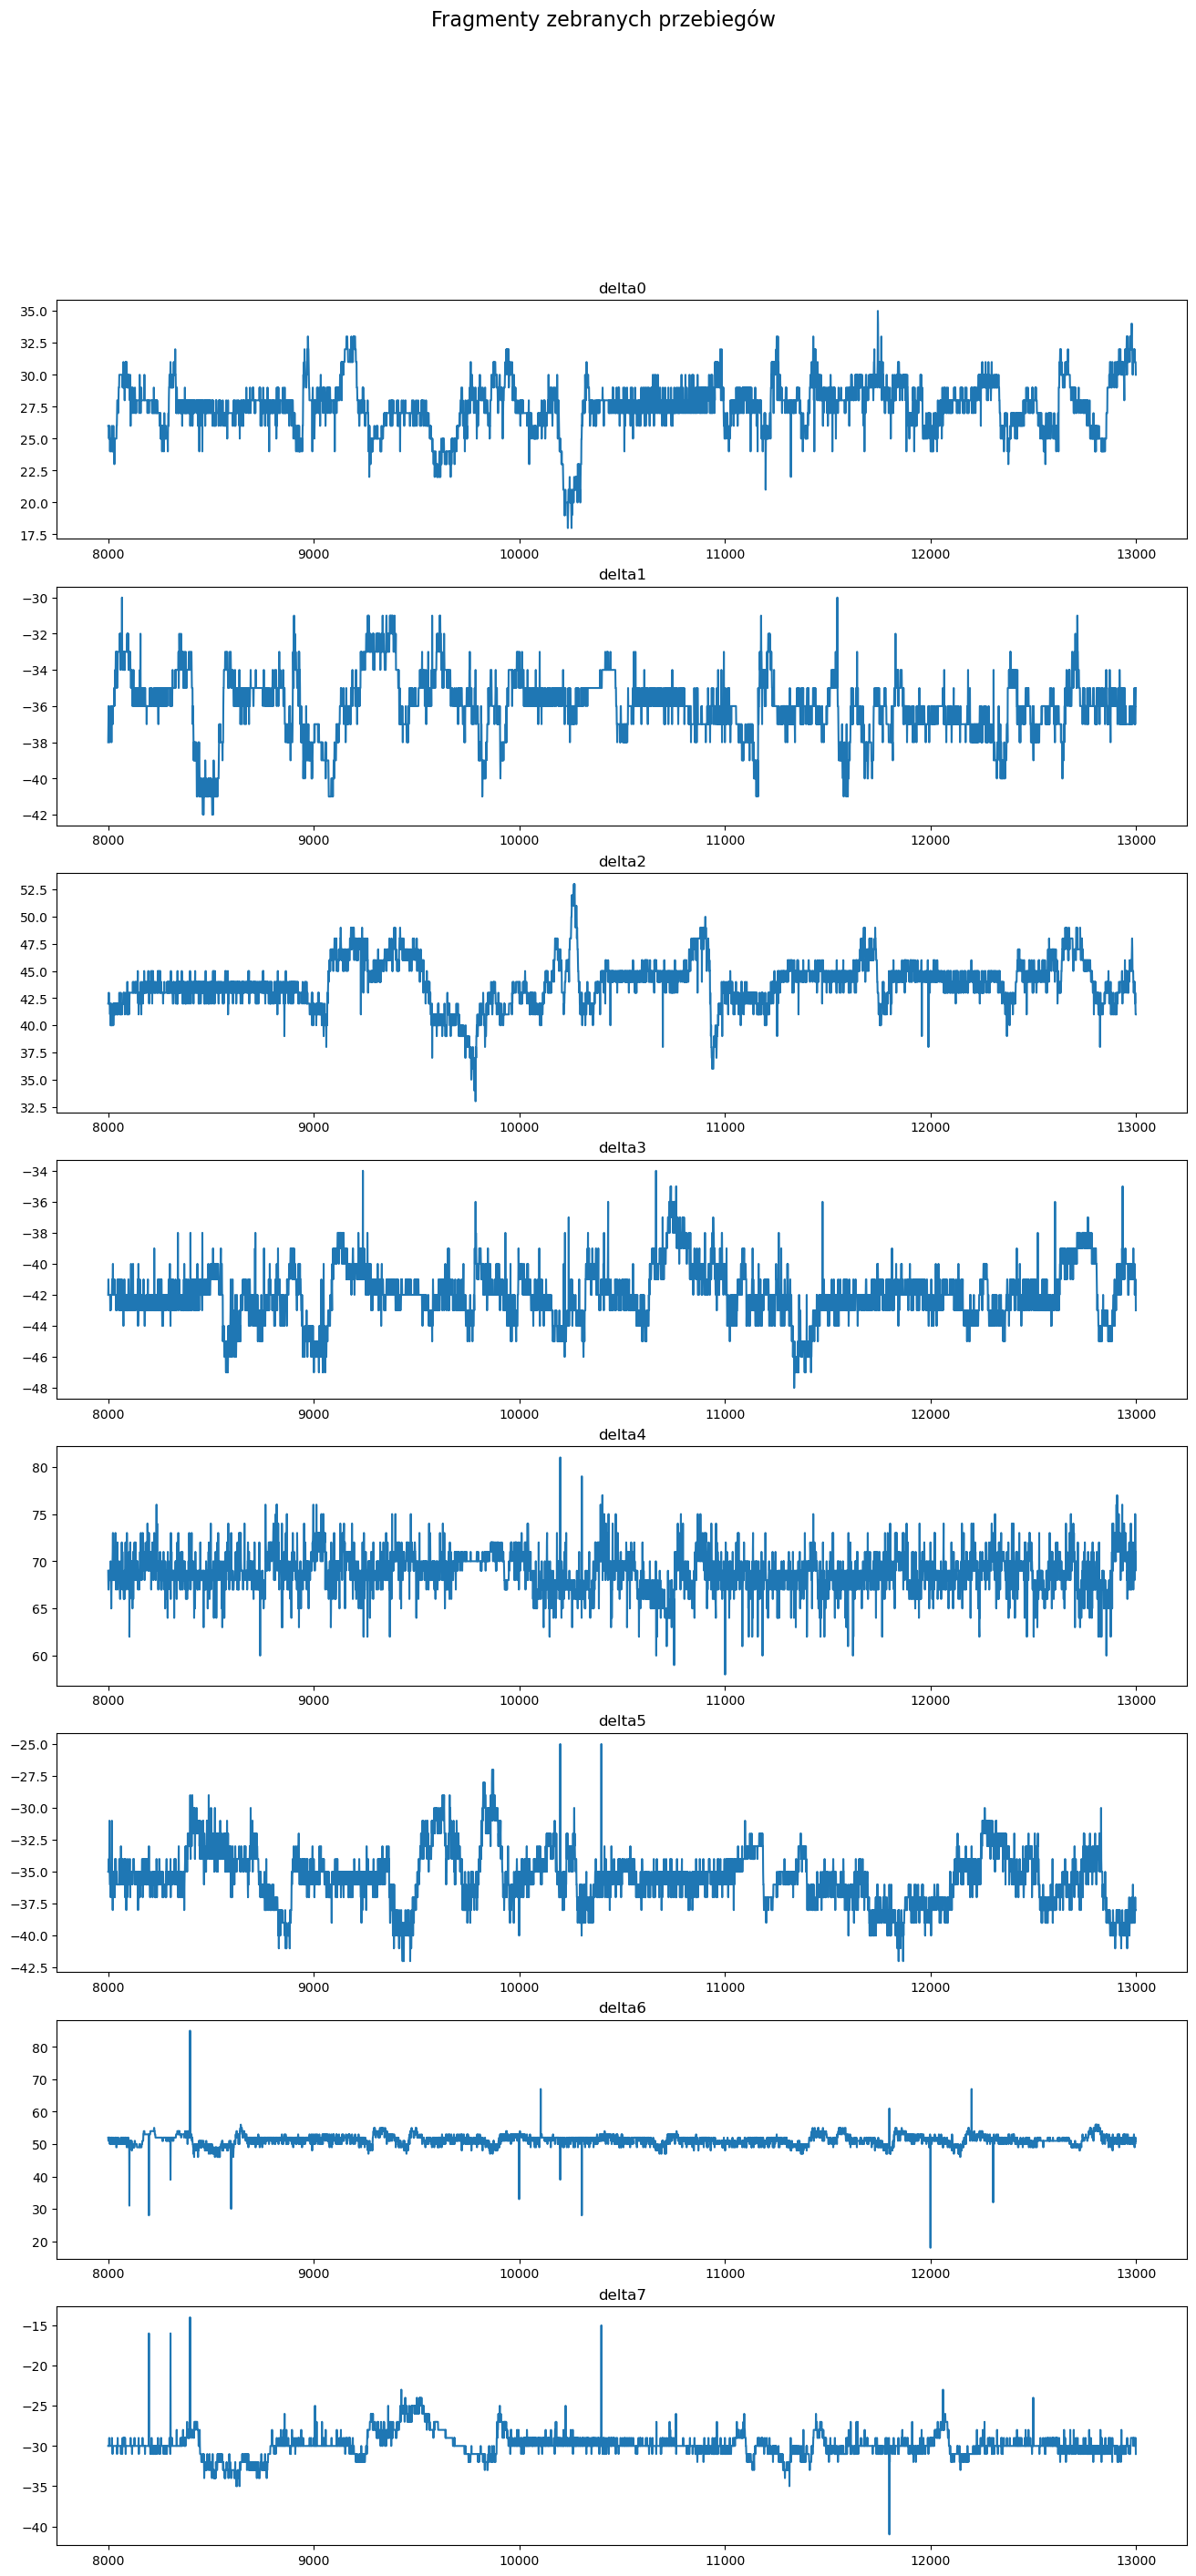

In [59]:
# Plot short fragments of all channels in one figure

range_length = 5000
start_indices = [8000] * 8

# Plot short fragments of all channels in one figure

fig, axes = plt.subplots(8, 1, figsize=(16, 32))
axes = axes.flatten()
fig.suptitle('Fragmenty zebranych przebiegów', fontsize=16)

for i, channel in enumerate(channels):
    axes[i].plot(raw_data[channel][start_indices[i]:start_indices[i] + range_length])
    axes[i].set_title(f'{channel}')

In [67]:
avg_filtered_data = raw_data.copy()

for channel in channels:
    avg_filtered_data[channel] = raw_data[channel].rolling(window=20).mean()

print(avg_filtered_data.head(100))

       time  delta0  delta1  delta2  delta3  delta4  delta5  delta6  delta7
0   2764383     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
1   2764393     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
2   2764403     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
3   2764413     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
4   2764423     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
..      ...     ...     ...     ...     ...     ...     ...     ...     ...
95  2765333   26.85   -36.8   44.45  -43.35   65.45  -35.25   51.55  -25.65
96  2765343   26.85   -36.8   44.35  -43.35   65.70  -35.15   51.50  -25.40
97  2765353   26.85   -36.7   44.20  -43.25   65.85  -35.05   51.45  -25.25
98  2765363   26.85   -36.7   44.15  -43.15   66.15  -35.00   51.45  -25.10
99  2765373   26.85   -36.7   44.10  -43.10   66.25  -34.90   52.40  -25.10

[100 rows x 9 columns]


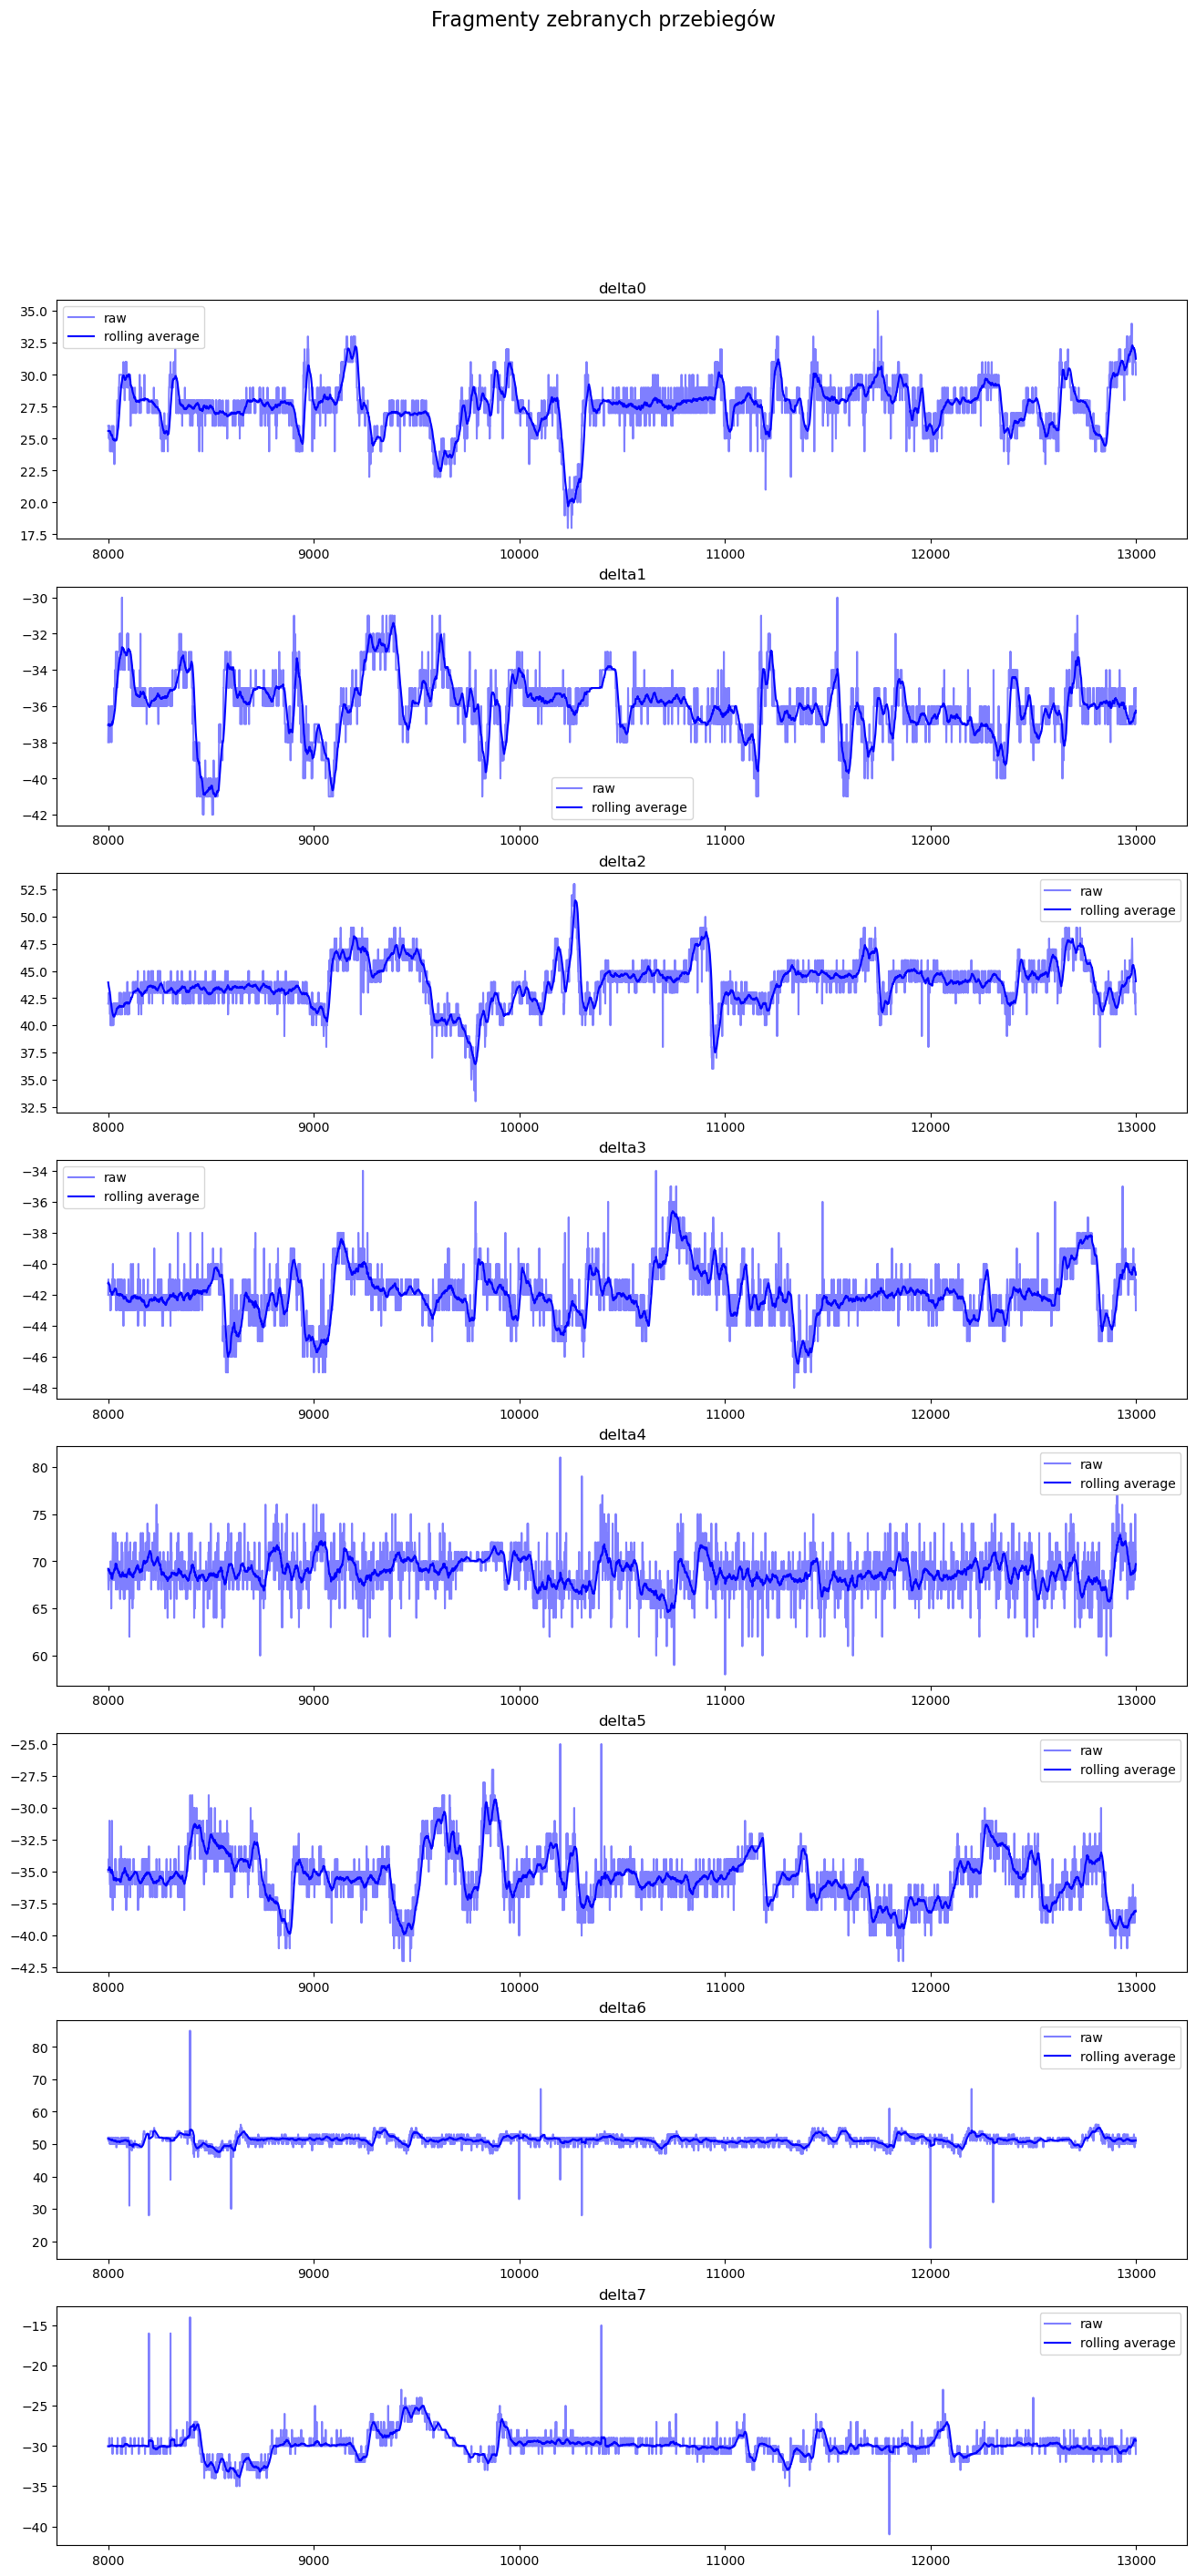

In [ ]:
fig, axes = plt.subplots(8, 1, figsize=(16, 32))
axes = axes.flatten()
fig.suptitle('Filtrowanie przebiegów', fontsize=16)

for i, channel in enumerate(channels):
    axes[i].plot(raw_data[channel][start_indices[i]:start_indices[i] + range_length], label='raw', alpha=0.5, color='blue')
    axes[i].plot(avg_filtered_data[channel][start_indices[i]:start_indices[i] + range_length], label='rolling average', color='blue')
    axes[i].legend()
    axes[i].set_title(f'{channel}')